In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import string
import nltk
from wordcloud import WordCloud

In [25]:
with open("text1.txt", "r", encoding="utf-8") as file1:
    text1 = file1.read() 

with open("text2.txt", "r", encoding="utf-8") as file2:
    text2 = file2.read()  

print(type(text1))
print(type(text2))

<class 'str'>
<class 'str'>


In [51]:
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    cleaned_words = [word for word in words if word not in stop_words]
    return ' '.join(cleaned_words)

with open("text1.txt", "r", encoding="utf-8") as file1:
    text1 = file1.read()

with open("text2.txt", "r", encoding="utf-8") as file2:
    text2 = file2.read()

cleaned_text1 = clean_text(text1)
cleaned_text2 = clean_text(text2)

print("Cleaned Text 1:")
print(cleaned_text1)

print("\nCleaned Text 2:")
print(cleaned_text2)

Cleaned Text 1:
consciousness makes mindbody problem really intractable perhaps current discussions problem give little attention get obviously wrong recent wave reductionist euphoria produced several analyses mental phenomena mental concepts designed explain possibility variety materialism psychophysical identification reduction problems dealt common type reduction types makes mindbody problem unique unlike waterh20 problem turing machineibm machine problem lightningelectrical discharge problem genedna problem oak treehydrocarbon problem ignored every reductionist favorite analogy modern science unlikely unrelated examples successful reduction shed light relation mind brain philosophers share general human weakness explanations incomprehensible terms suited familiar well understood though entirely different led acceptance implausible accounts mental largely would permit familiar kinds reduction shall try explain usual examples help us understand relation mind body indeed present conce

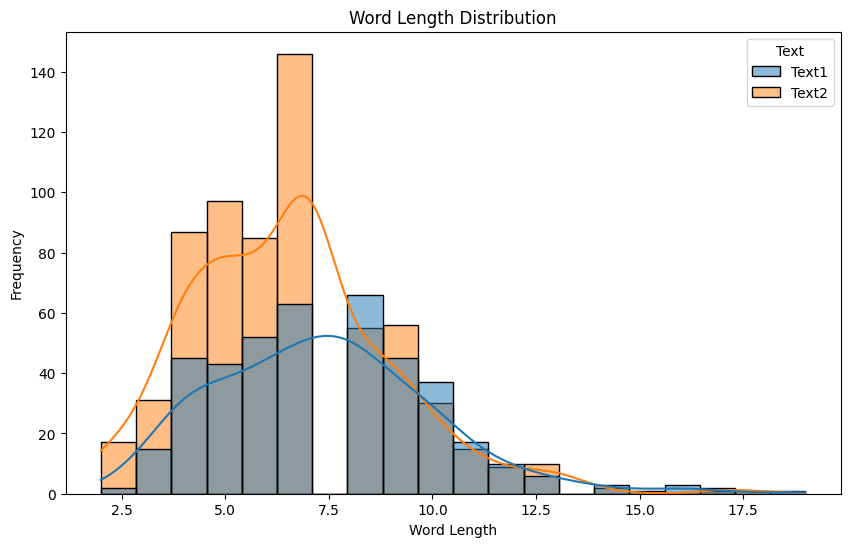

In [56]:
def calculate_word_lengths(cleaned_text):
    words = cleaned_text.split()
    word_lengths = [len(word) for word in words]
    return word_lengths

word_lengths_text1 = calculate_word_lengths(cleaned_text1)
word_lengths_text2 = calculate_word_lengths(cleaned_text2)

lengths_df = pd.DataFrame({
    'Text': ['Text1'] * len(word_lengths_text1) + ['Text2'] * len(word_lengths_text2),
    'Word_Length': word_lengths_text1 + word_lengths_text2
})

plt.figure(figsize=(10, 6))
sns.histplot(data=lengths_df, x="Word_Length", hue="Text", kde=True, bins=20)
plt.title('Word Length Distribution')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.show()

Summary of Words Per Sentence:
       count       mean        std  min    25%   50%   75%   max
Text                                                            
Text1   40.0  20.625000  11.267579  1.0  11.75  19.5  26.5  51.0
Text2   45.0  28.911111  15.330929  8.0  18.00  25.0  35.0  68.0


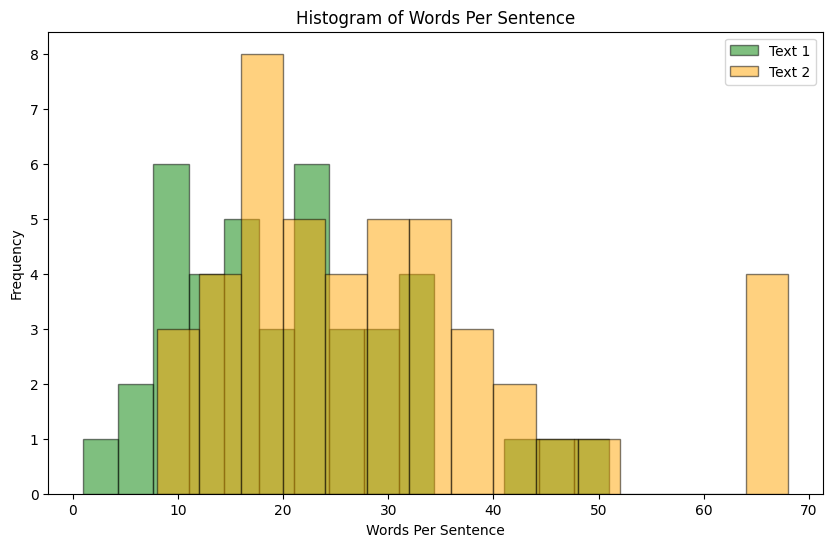

In [55]:
def calculate_words_per_sentence(raw_text):
    sentences = raw_text.split('.')
    words_per_sentence = [len(sentence.split()) for sentence in sentences if len(sentence.strip()) > 0]
    return words_per_sentence

words_per_sentence_text1 = calculate_words_per_sentence(text1)
words_per_sentence_text2 = calculate_words_per_sentence(text2)

sentence_length_df = pd.DataFrame({
    'Text': ['Text1'] * len(words_per_sentence_text1) + ['Text2'] * len(words_per_sentence_text2),
    'Words_Per_Sentence': words_per_sentence_text1 + words_per_sentence_text2
})


print("Summary of Words Per Sentence:")
print(sentence_length_df.groupby('Text')['Words_Per_Sentence'].describe())

plt.figure(figsize=(10, 6))
plt.hist(words_per_sentence_text1, bins=15, alpha=0.5, label="Text 1", color='green', edgecolor='black')
plt.hist(words_per_sentence_text2, bins=15, alpha=0.5, label="Text 2", color='orange', edgecolor='black')
plt.title('Histogram of Words Per Sentence')
plt.xlabel('Words Per Sentence')
plt.ylabel('Frequency')
plt.legend()
plt.show()

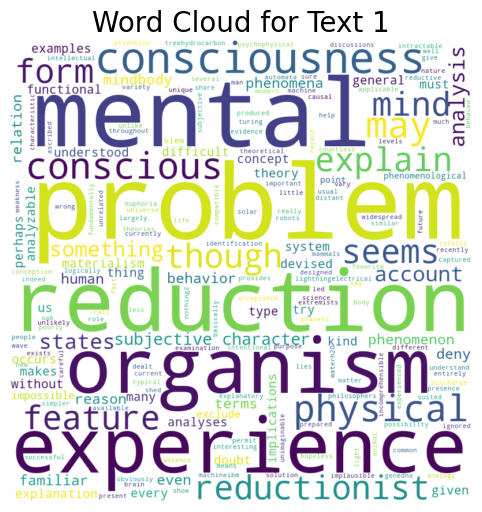

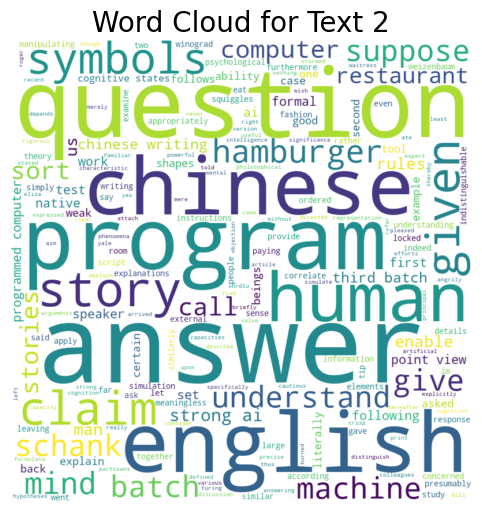

In [58]:
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.title(title, fontsize=20)
    plt.show()

generate_word_cloud(cleaned_text1, "Word Cloud for Text 1")

generate_word_cloud(cleaned_text2, "Word Cloud for Text 2")
